# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from os import path
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Variable for date
current_date = dt.date.today()

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Assigning base url
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Setting full_pass variable to check if output data already exists. Saves processing time and ensures consistency. 
if path.exists("../output_data/cities.csv"):
    full_pass = True
else:
    full_pass = False

if full_pass == True:
    df = pd.read_csv("../output_data/cities.csv")
    print(full_pass)
    
else:
    print(full_pass)
    df = pd.DataFrame()
    columns = ['City', 'Country', 'Latitude', 'Longitude', 'Date', 'Temperature', 'Maximum Tempurature', 'Humidity', 'Cloudiness', 'Wind Speed']
    
    
    # Loop through the cities
    for city in cities:
        try:
            url = f"{base_url}?q={city}&appid={weather_api_key}"
            
            response = requests.get(url).json()
            
            # Get city data
            country = response['sys']['country']
            lat = response['coord']['lat']
            lng = response['coord']['lon']
            date = response['dt']
            temp = ((response['main']['temp']) * 1.8 - 459.67)
            max_temp = ((response['main']['temp_max']) * 1.8 - 459.67)
            humidity = response['main']['humidity']
            cloud = response['clouds']['all']
            wind = (response['wind']['speed']) * 1.6
            
            data = [city, country, lat, lng, date, temp, max_temp, humidity, cloud, wind]
            print(f"Data for {city}:{data}")
            city_series = pd.Series(data)
            df = df.append(city_series, ignore_index=True)
        except(KeyError):
                print(f"Encountered error, skipping {city}")
    df.columns = columns
    df.to_csv("../output_data/cities.csv", index=False)

True


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df

,City,Country,Latitude,Longitude,Date,Temperature,Maximum Tempurature,Humidity,Cloudiness,Wind Speed
0,rheinau,DE,48.87,8.20,1.585543e+09,33.656,35.996,59.0,90.0,13.920
1,kavieng,PG,-2.57,150.80,1.585543e+09,82.004,82.004,76.0,96.0,2.912
2,bengkulu,ID,-3.80,102.27,1.585543e+09,83.570,83.570,72.0,100.0,7.392
3,saint anthony,US,45.02,-93.22,1.585543e+09,41.378,44.996,45.0,1.0,5.760
4,west bay,KY,19.37,-81.42,1.585543e+09,78.710,78.998,94.0,20.0,5.760
...,...,...,...,...,...,...,...,...,...,...
585,seymchan,RU,62.88,152.43,1.585543e+09,19.292,19.292,86.0,19.0,4.800
586,muli,MV,2.92,73.57,1.585543e+09,83.318,83.318,61.0,53.0,1.904
587,medea,DZ,36.26,2.75,1.585543e+09,42.800,42.800,100.0,20.0,3.248
588,namatanai,PG,-3.67,152.43,1.585543e+09,84.020,84.020,74.0,83.0,6.720


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
# Making function for all the plots. Rule #1 of programming: Do not repeat yourself
def scatter(df, x, y, title, xlabel, ylabel, reg=False):
    x_axis = df[x]
    y_axis = df[y]
    
    plt.scatter(x_axis, y_axis, marker="o", edgecolors='black')
    plt.title(f"{title} for {current_date}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # reg boolean means this can be used for normal scatter plots and regression scatter plots
    if reg==True:
        (slope, int, r, p, std_err) = linregress(x_axis, y_axis)
        regress_values = x_axis * slope + int
        line_eq = f"y={round(slope, 3)}x+{round(int,2)}"
        print(f"r is {r}")
        plt.plot(x_axis,regress_values,"r-")
        plt.annotate(line_eq, xy=(x_axis.mean(), y_axis.mean()), fontsize=16,color="red")
    
    plt.savefig(f"../output_data/{title}.png")
    plt.show()

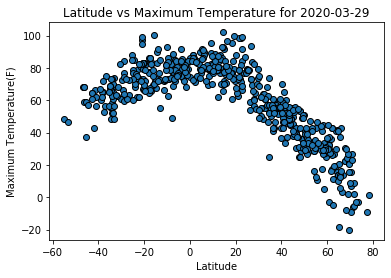

Temperature rises near the equator with the Southern Hemisphere being currently warmer than the Northern Hemisphere. No surprises here.


In [10]:
scatter(df, 'Latitude', 'Maximum Tempurature', 'Latitude vs Maximum Temperature', 'Latitude', 'Maximum Temperature(F)')
print("Temperature rises near the equator with the Southern Hemisphere being currently warmer than the Northern Hemisphere. No surprises here.")

#### Latitude vs. Humidity Plot

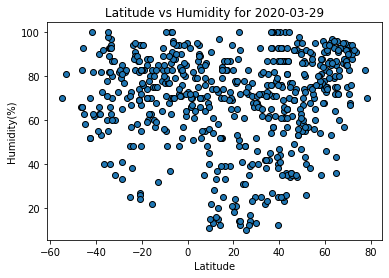

More humidity in the Northern Hemisphere. Possibly due to the trade winds that keep place like Britain warm


In [11]:
scatter(df, 'Latitude', 'Humidity', 'Latitude vs Humidity', 'Latitude', 'Humidity(%)')
print("More humidity in the Northern Hemisphere. Possibly due to the trade winds that keep place like Britain warm")

#### Latitude vs. Cloudiness Plot

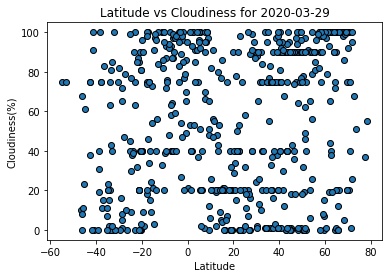

Lower and higher cloudiness levels seem more common. Seemingly no relationship to latitude though.


In [12]:
scatter(df, 'Latitude', 'Cloudiness', 'Latitude vs Cloudiness', 'Latitude', 'Cloudiness(%)')
print("Lower and higher cloudiness levels seem more common. Seemingly no relationship to latitude though.")

#### Latitude vs. Wind Speed Plot

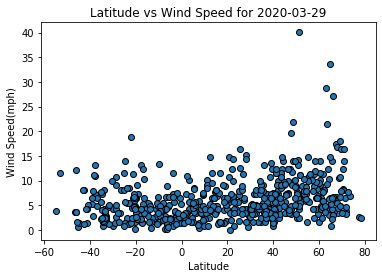

In [9]:
scatter(df, 'Latitude', 'Wind Speed', 'Latitude vs Wind Speed', 'Latitude', 'Wind Speed(mph)')
print("There may be higher windiness in the north. Difficult to say for sure.")

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = df[df['Latitude'] >= 0]
south_hem = df[df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r is -0.9113110474729812


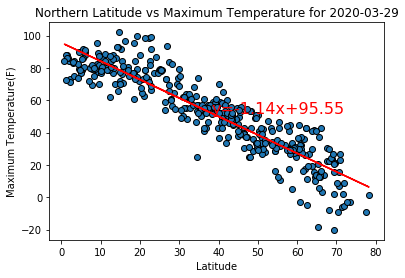

Negative correlation the further you get from the equator.


In [15]:
scatter(north_hem, 'Latitude', 'Maximum Tempurature', 'Northern Latitude vs Maximum Temperature', 'Latitude', 'Maximum Temperature(F)', reg=True)
print("Negative correlation the further you get from the equator.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r is 0.6005838591043355


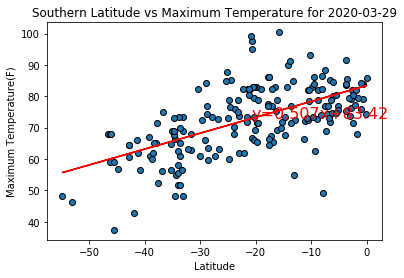

Positive correlation as you approach the equator


In [16]:
scatter(south_hem, 'Latitude', 'Maximum Tempurature', 'Southern Latitude vs Maximum Temperature', 'Latitude', 'Maximum Temperature(F)', reg=True)
print("Positive correlation as you approach the equator")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r is 0.2945121078363595


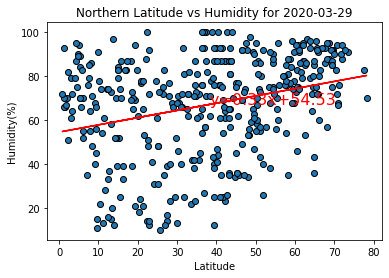

Positive correlation. It is indeed more humid the further north you go.


In [17]:
scatter(north_hem, 'Latitude', 'Humidity', 'Northern Latitude vs Humidity', 'Latitude', 'Humidity(%)', reg=True)
print("Positive correlation. It is indeed more humid the further north you go.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r is 0.11606925040236195


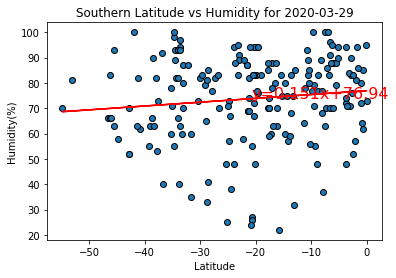

The northern humidity seems to hold true to a lesser extent south of the equator. Interesting.


In [18]:
scatter(south_hem, 'Latitude', 'Humidity', 'Southern Latitude vs Humidity', 'Latitude', 'Humidity(%)', reg=True)
print("The northern humidity seems to hold true to a lesser extent south of the equator. Interesting.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r is 0.2071717916506426


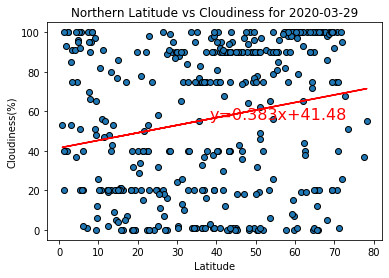

A slight positive correlation the further north you go. This is most likely related to the higher humidity.


In [19]:
scatter(north_hem, 'Latitude', 'Cloudiness', 'Northern Latitude vs Cloudiness', 'Latitude', 'Cloudiness(%)', reg=True)
print("A slight positive correlation the further north you go. This is most likely related to the higher humidity.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r is 0.4043949812791169


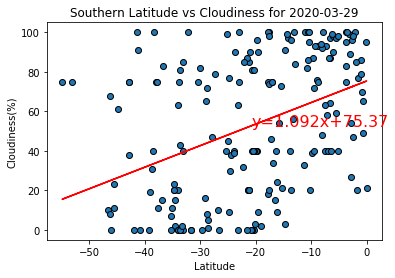

An even stronger northward correlation in the Southern Hemisphere. I could be that the correlation in the north is in spite of the equator.


In [20]:
scatter(south_hem, 'Latitude', 'Cloudiness', 'Southern Latitude vs Cloudiness', 'Latitude', 'Cloudiness(%)', reg=True)
print("An even stronger northward correlation in the Southern Hemisphere. I could be that the correlation in the north is in spite of the equator.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r is 0.29197945136840586


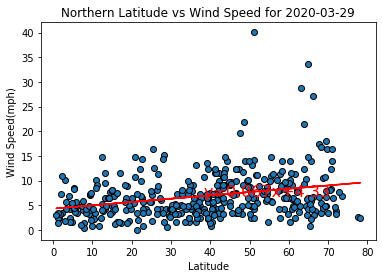

An ever so slight increase in windiness the further you get from the equator.


In [21]:
scatter(north_hem, 'Latitude', 'Wind Speed', 'Northern Latitude vs Wind Speed', 'Latitude', 'Wind Speed(mph)', reg=True)
print("An ever so slight increase in windiness the further you get from the equator.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r is -0.15385144570274203


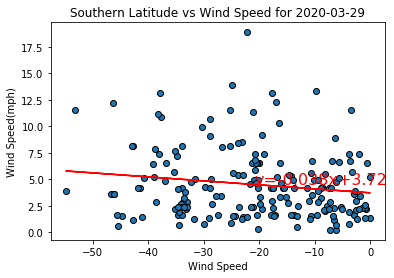

An ever so slight decrease in windiness as you approach the equator.


In [22]:
scatter(south_hem, 'Latitude', 'Wind Speed', 'Southern Latitude vs Wind Speed', 'Wind Speed', 'Wind Speed(mph)', reg=True)
print("An ever so slight decrease in windiness as you approach the equator.")